This notebook contains some basic Python material relevant for Computational Physics.

In [1]:
# This is "magic" (a technical term for the use of the % sign) which 
# allows the plotting routines of matplotlib to appear in the notebook
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


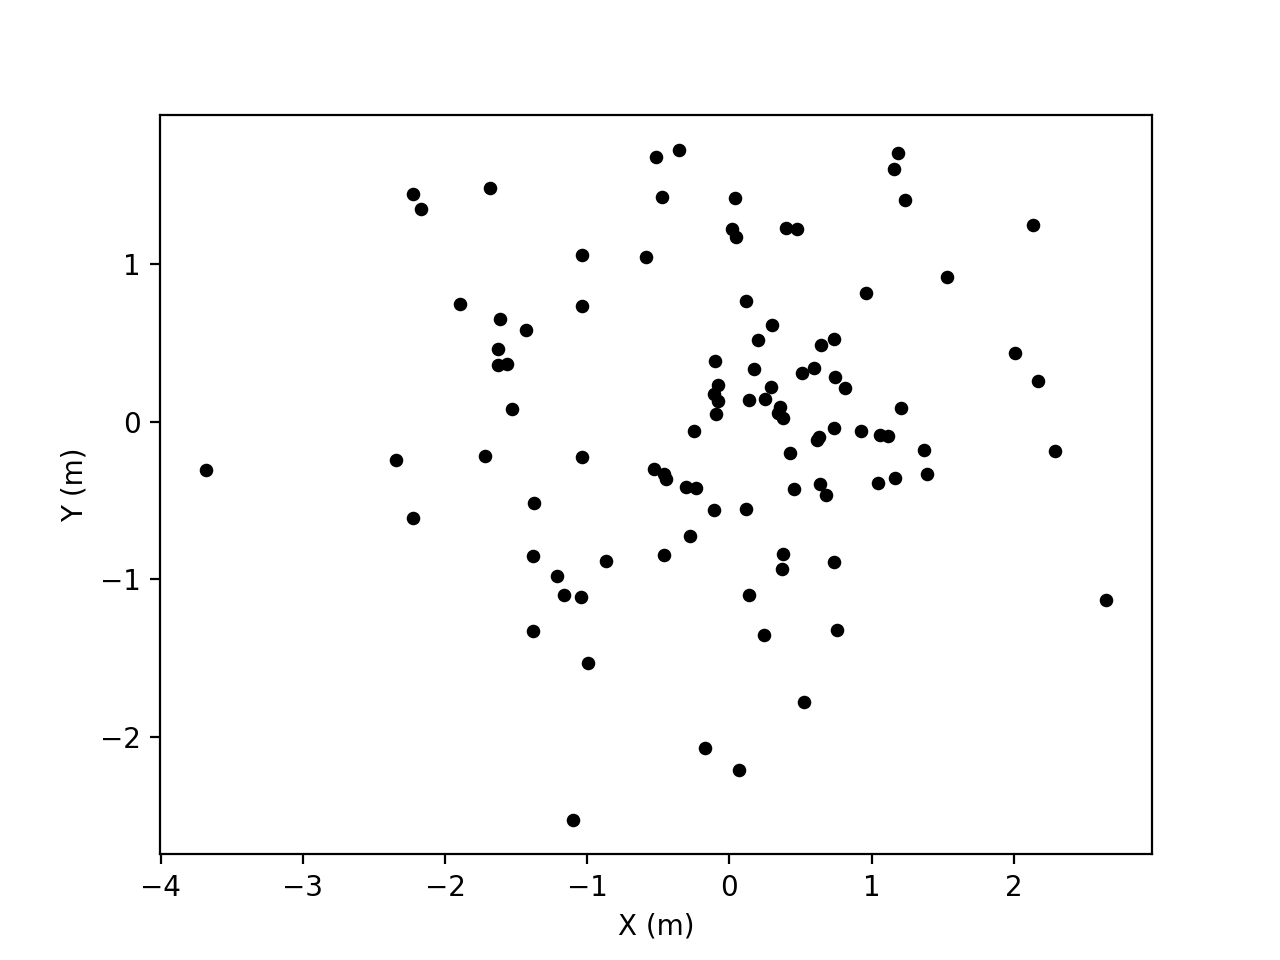

In [5]:
x = np.random.normal(size = 100)
y = np.random.normal(size = 100)
plt.scatter(x, y, 15, c='black')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.savefig('scatter.png')